In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## cities kpi 2020

année 2020 seulement


In [9]:
cdpkpi = pd.read_csv('../raw_data/CDP-Cities-KPI.csv')

In [10]:
cdpkpi.columns

Index(['Unnamed: 0', 'Year.Reported.to.CDP', 'Account.Number', 'Organization',
       'City', 'Country', 'CDP.Region', 'First.Time.Discloser', 'Population',
       'City.Location', 'Sustainability.Targets.Master.Planning',
       'Risk.Assessment.Actions', 'Nb.Hazards.Type', 'Hazards.Exposure.Level',
       'Adaptation.Challenges.Health', 'Adaptation.Challenges.Economic',
       'Adaptation.Challenges.Environment',
       'Adaptation.Challenges.Infrastructure', 'Adaptation.Challenges.Social',
       'Adaptation.Challenges.Governance', 'Adaptation.Challenges.Education',
       'Adaptation.Challenges.Level', 'Risk.Health.System',
       'Nb.Adaptation.Actions', 'Adaptation.Plan',
       'City.Wide.Emissions.Inventory', 'GHG.Emissions.Primary.protocol',
       'GHG.Emissions.Evolution', 'GHG.Emissions.Consumption',
       'GHG.Emissions.External.Verification',
       'GHG.Emissions.Reductions.Targets',
       'Emissions.Reductions.Mitigation.Planning',
       'Opportunities.Collaboration'

In [13]:
col = ['Account.Number', 'Organization','City', 'Country','Population','Hazards.Exposure.Level','Adaptation.Challenges.Level', 'Risk.Health.System','Potable.Water.Supply.Percent','lat', 'long']

In [14]:
new = cdpkpi[col]
new

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long
0,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,692587.0,41.0,2.0,Yes,100.00,36.162700,-86.781600
1,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,68823.0,12.0,NaN,No,100.00,-20.285800,-50.247500
2,57509,Prefeitura Niterói,Niterói,Brazil,513584.0,121.0,NaN,Yes,100.00,-22.892800,-43.118400
3,60114,City of Gdynia,Gdynia,Poland,246348.0,NaN,NaN,NaN,NaN,54.518900,18.530500
4,32550,City of Denver,Denver,United States of America,716492.0,65.0,NaN,Yes,100.00,39.737600,-104.985000
5,54519,City of Lund,Lund,Sweden,124935.0,74.0,NaN,Yes,100.00,55.702930,13.192945
6,35897,Municipality of Campinas,Campinas,Brazil,1204073.0,123.0,NaN,Yes,99.81,-22.744000,-46.937200
7,68383,Prefeitura de Itatiba,Itatiba,Brazil,115051.0,12.0,NaN,Yes,99.00,-12.250000,-38.970000
8,59563,"City of Takoma Park, MD",Takoma Park,United States of America,17765.0,80.0,NaN,Yes,100.00,38.977900,-77.007500
9,31165,Stadt Heidelberg,Heidelberg,Germany,148365.0,38.0,2.0,No,99.00,49.398800,8.672430


In [48]:
def cleanan(x):
    if pd.isna(x):
        return 0
    else:
        return x
    
def strinan(x):
    if x == "Yes":
        return 1
   
    else:
        return 0
def pournan(x):
    if pd.isna(x):
        return 100
    else:
        return (100-x)
    
def ssminmax(x):
    m=0
    M=100
    return (x-m)/(M-m)

In [31]:
new1 = new.copy()

In [32]:
new1

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long
0,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,692587.0,41.0,2.0,Yes,100.00,36.162700,-86.781600
1,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,68823.0,12.0,NaN,No,100.00,-20.285800,-50.247500
2,57509,Prefeitura Niterói,Niterói,Brazil,513584.0,121.0,NaN,Yes,100.00,-22.892800,-43.118400
3,60114,City of Gdynia,Gdynia,Poland,246348.0,NaN,NaN,NaN,NaN,54.518900,18.530500
4,32550,City of Denver,Denver,United States of America,716492.0,65.0,NaN,Yes,100.00,39.737600,-104.985000
5,54519,City of Lund,Lund,Sweden,124935.0,74.0,NaN,Yes,100.00,55.702930,13.192945
6,35897,Municipality of Campinas,Campinas,Brazil,1204073.0,123.0,NaN,Yes,99.81,-22.744000,-46.937200
7,68383,Prefeitura de Itatiba,Itatiba,Brazil,115051.0,12.0,NaN,Yes,99.00,-12.250000,-38.970000
8,59563,"City of Takoma Park, MD",Takoma Park,United States of America,17765.0,80.0,NaN,Yes,100.00,38.977900,-77.007500
9,31165,Stadt Heidelberg,Heidelberg,Germany,148365.0,38.0,2.0,No,99.00,49.398800,8.672430


In [33]:
num_col=['Hazards.Exposure.Level','Adaptation.Challenges.Level']
stri_col=['Risk.Health.System']

In [34]:
#new1['Hazards.Exposure.Level']=new1['Hazards.Exposure.Level'].apply(cleanan)
#new1['Adaptation.Challenges.Level']=new1['Adaptation.Challenges.Level'].apply(cleanan)
#new1['Risk.Health.System']=new1['Risk.Health.System'].apply(strinan)
#new1['Potable.Water.Supply.vulnerability']=new1['Potable.Water.Supply.Percent'].apply(pournan)

In [35]:
new1

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long,Potable.Water.Supply.vulnerability
0,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,692587.0,41.0,2.0,1,100.00,36.162700,-86.781600,0.00
1,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,68823.0,12.0,0.0,0,100.00,-20.285800,-50.247500,0.00
2,57509,Prefeitura Niterói,Niterói,Brazil,513584.0,121.0,0.0,1,100.00,-22.892800,-43.118400,0.00
3,60114,City of Gdynia,Gdynia,Poland,246348.0,0.0,0.0,0,NaN,54.518900,18.530500,100.00
4,32550,City of Denver,Denver,United States of America,716492.0,65.0,0.0,1,100.00,39.737600,-104.985000,0.00
5,54519,City of Lund,Lund,Sweden,124935.0,74.0,0.0,1,100.00,55.702930,13.192945,0.00
6,35897,Municipality of Campinas,Campinas,Brazil,1204073.0,123.0,0.0,1,99.81,-22.744000,-46.937200,0.19
7,68383,Prefeitura de Itatiba,Itatiba,Brazil,115051.0,12.0,0.0,1,99.00,-12.250000,-38.970000,1.00
8,59563,"City of Takoma Park, MD",Takoma Park,United States of America,17765.0,80.0,0.0,1,100.00,38.977900,-77.007500,0.00
9,31165,Stadt Heidelberg,Heidelberg,Germany,148365.0,38.0,2.0,0,99.00,49.398800,8.672430,1.00


In [44]:
new1['Adaptation.Challenges.Level'].min()

0.0

In [41]:
#new1['exposure.level']=new1['Hazards.Exposure.Level'].apply(ssminmaxe)
#new1['City.Adaptation.Challenges.Index'] =new1['Adaptation.Challenges.Level'].apply(ssminmax)
#new1['Potable.Water.Supply.vulnerability']= new1['Potable.Water.Supply.vulnerability'].apply(ssminmax)
#new1['sensitivity.index']=(new1['Risk.Health.System'] + new1['Potable.Water.Supply.vulnerability'])/2
#new1['Vulnerability']=(new1['exposure.level']+new1['City.Adaptation.Challenges.Index']+new1['sensitivity.index'])/3

In [55]:
new1

,Account.Number,Organization,City,Country,Population,Hazards.Exposure.Level,Adaptation.Challenges.Level,Risk.Health.System,Potable.Water.Supply.Percent,lat,long,Potable.Water.Supply.vulnerability,exposure.level,City.Adaptation.Challenges.Index,sensitivity.index,Vulnerability
0,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,692587.0,41.0,2.0,1,100.00,36.162700,-86.781600,0.0000,0.116477,0.250,0.50000,0.288826
1,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,68823.0,12.0,0.0,0,100.00,-20.285800,-50.247500,0.0000,0.034091,0.000,0.00000,0.011364
2,57509,Prefeitura Niterói,Niterói,Brazil,513584.0,121.0,0.0,1,100.00,-22.892800,-43.118400,0.0000,0.343750,0.000,0.50000,0.281250
3,60114,City of Gdynia,Gdynia,Poland,246348.0,0.0,0.0,0,NaN,54.518900,18.530500,1.0000,0.000000,0.000,0.50000,0.166667
4,32550,City of Denver,Denver,United States of America,716492.0,65.0,0.0,1,100.00,39.737600,-104.985000,0.0000,0.184659,0.000,0.50000,0.228220
5,54519,City of Lund,Lund,Sweden,124935.0,74.0,0.0,1,100.00,55.702930,13.192945,0.0000,0.210227,0.000,0.50000,0.236742
6,35897,Municipality of Campinas,Campinas,Brazil,1204073.0,123.0,0.0,1,99.81,-22.744000,-46.937200,0.0019,0.349432,0.000,0.50095,0.283461
7,68383,Prefeitura de Itatiba,Itatiba,Brazil,115051.0,12.0,0.0,1,99.00,-12.250000,-38.970000,0.0100,0.034091,0.000,0.50500,0.179697
8,59563,"City of Takoma Park, MD",Takoma Park,United States of America,17765.0,80.0,0.0,1,100.00,38.977900,-77.007500,0.0000,0.227273,0.000,0.50000,0.242424
9,31165,Stadt Heidelberg,Heidelberg,Germany,148365.0,38.0,2.0,0,99.00,49.398800,8.672430,0.0100,0.107955,0.250,0.00500,0.120985


In [56]:
y=new1['Vulnerability']

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='Country', ylabel='Vulnerability'>

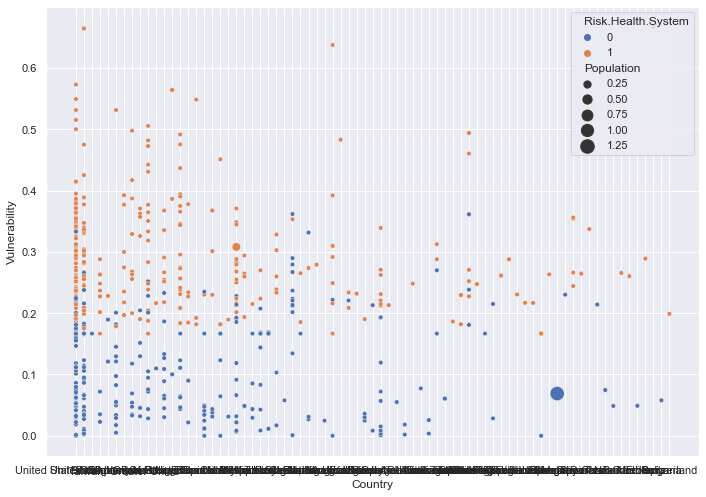

In [70]:
sns.scatterplot(x=new1['Country'],y =y,size=new1['Population'],hue=new1['Risk.Health.System'],sizes=(20, 200))